<a href="https://colab.research.google.com/github/SvenjaMiklaszewska/Monte-Carlo-Project/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sstats

import urllib.request

def read_digits(url):

    data = []
    with urllib.request.urlopen(url) as f:
        for line in f:
            data.append(line.strip())
    datastring = []


    for line in data:
        datastring.append(line.decode("utf-8"))

    datastring = ''.join(datastring)
    datastring = list(map(int, list(datastring)))

    return(np.array(datastring))


digits_pi = read_digits('http://www.math.uni.wroc.pl/~rolski/Zajecia/data.pi')
digits_e = read_digits('http://www.math.uni.wroc.pl/~rolski/Zajecia/data.e')
digits_sqrt2 = read_digits('http://www.math.uni.wroc.pl/~rolski/Zajecia/data.sqrt2')


print(digits_pi[:10])
print(digits_e[:10])
print(digits_sqrt2[:10])



[1 1 0 0 1 0 0 1 0 0]
[1 0 1 0 1 1 0 1 1 1]
[1 0 1 1 0 1 0 1 0 0]


# LCG (M,a,c)

$x_n = (ax_{n-1} + c)$ mod M


In [ ]:

import numpy as np

def lcg(m, a, c, x0, n):
  xn = x0
  sequence = []
  for _ in range(n):
    xn = (a * xn + c) % m
    sequence.append(xn)
  return np.array(sequence)
m = 13
a = 1
c = 5
x0 = 8
n = 10**5 #

lcg_sequence = lcg(m, a, c, x0, n)

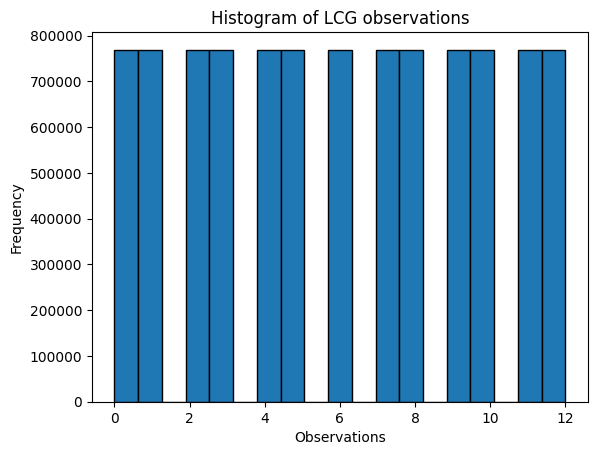

In [ ]:

plt.hist(lcg_sequence, bins=19, edgecolor='black')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Histogram of LCG observations')
plt.show()

# GLCG (M,$a_i$, i =1,...,k)

$x_n = (a_1x_{n-1} + ... + a_kx_{n-k})$ mod M

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sstats
import urllib.request


def glcg(m, a_coefficients, initial_values, n):
    k = len(a_coefficients)
    xn = initial_values[:]

    sequence = []
    for _ in range(n):
        next_xn = 0
        for i in range(k):
            next_xn = (next_xn + a_coefficients[i] * xn[i]) % m
        sequence.append(next_xn)
        xn = [next_xn] + xn[:-1] # Shift values for next iteration

    return np.array(sequence)



m = 2**10
a_coefficients = [3, 7, 68]
initial_values = [4, 88, 0]  # Example initial values
n = 10**5

glcg_sequence = glcg(m, a_coefficients, initial_values, n)
print("\nGLCG Sequence:", glcg_sequence)


GLCG Sequence: [628 728 708 ... 280 324 836]


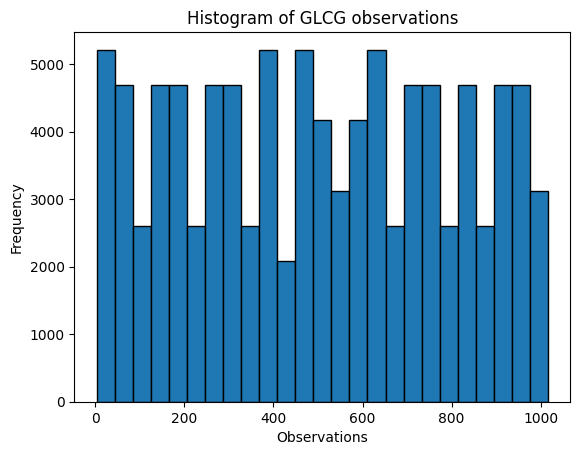

In [ ]:

plt.hist(glcg_sequence, bins=25, edgecolor='black')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Histogram of GLCG observations')
plt.show()

# RC4(32)
KEY

In [ ]:
import time

def KSA(key):
    """Key-scheduling algorithm (KSA)"""
    key_length = len(key)
    S = list(range(32))
    j = 0
    for i in range(32):
        j = (j + S[i] + key[i % key_length])%key_length
        S[i], S[j] = S[j], S[i]  # Swap values
    return S

def PRGA(S):
    """Pseudo-random generation algorithm (PRGA)"""
    i = 0
    j = 0
    while True:
        i = (i + 1) % 32
        j = (j + S[i]) % 32
        S[i], S[j] = S[j], S[i]  # Swap values
        K = S[(S[i] + S[j]) % 32]
        yield K

def initialize_with_key():
    """Initialize the RC4 with a key based on the current time"""
    # Use current time as the key
    current_time = int(time.time())
    key = [current_time & 0xff, (current_time >> 8) & 0xff, (current_time >> 16) & 0xff, (current_time >> 24) & 0xff]
    return key

# Initialize RC4 with a key
key = initialize_with_key()
S = KSA(key)

# Generate pseudo-random bytes
prga = PRGA(S)
prga_result1 = [next(prga) for _ in range(10**5)]


In [ ]:
print(key)
print(prga_result1)

[83, 214, 93, 103]
[16, 17, 9, 24, 26, 19, 15, 4, 7, 25, 4, 19, 24, 17, 19, 20, 11, 26, 20, 9, 9, 19, 4, 6, 21, 23, 12, 16, 26, 9, 28, 21, 12, 11, 0, 21, 2, 9, 31, 7, 15, 15, 11, 22, 28, 15, 31, 6, 22, 1, 27, 1, 5, 22, 19, 30, 5, 14, 20, 26, 23, 8, 27, 21, 27, 2, 4, 28, 10, 24, 6, 27, 12, 21, 30, 1, 13, 5, 7, 30, 17, 25, 24, 29, 31, 31, 28, 20, 16, 18, 22, 25, 9, 10, 1, 1, 24, 9, 8, 31, 8, 15, 11, 29, 25, 12, 25, 0, 7, 10, 7, 30, 15, 6, 23, 19, 5, 27, 20, 7, 6, 30, 28, 24, 18, 1, 12, 25, 22, 3, 31, 4, 30, 13, 26, 28, 22, 17, 7, 19, 21, 10, 21, 13, 20, 31, 29, 17, 7, 15, 0, 13, 16, 24, 16, 20, 6, 6, 27, 1, 11, 7, 20, 11, 24, 4, 15, 18, 25, 14, 15, 14, 10, 2, 26, 6, 24, 11, 25, 26, 7, 14, 0, 26, 20, 1, 22, 16, 9, 5, 0, 8, 15, 16, 3, 8, 18, 27, 28, 13, 17, 12, 8, 8, 17, 8, 7, 28, 26, 27, 19, 2, 26, 20, 23, 1, 13, 16, 6, 27, 1, 25, 12, 20, 10, 16, 13, 7, 11, 15, 6, 6, 24, 20, 20, 23, 11, 13, 10, 7, 4, 3, 13, 6, 6, 28, 16, 8, 16, 11, 14, 5, 17, 10, 28, 19, 23, 29, 31, 27, 16, 9, 20, 6, 15, 

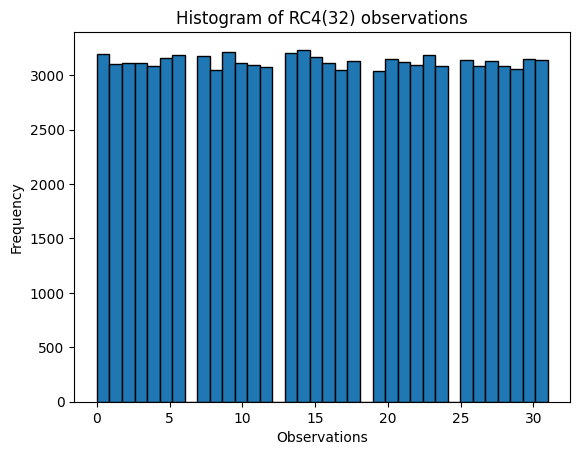

In [ ]:
plt.hist(prga_result1, bins=36, edgecolor='black')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Histogram of RC4(32) observations')
plt.show()

In [ ]:
# Initialize RC4 with a key
from matplotlib import pyplot as plt
key = np.array([4, 7, 20])
S = KSA(key)


prga = PRGA(S)
prga_result2 = [next(prga) for _ in range(10**5)]


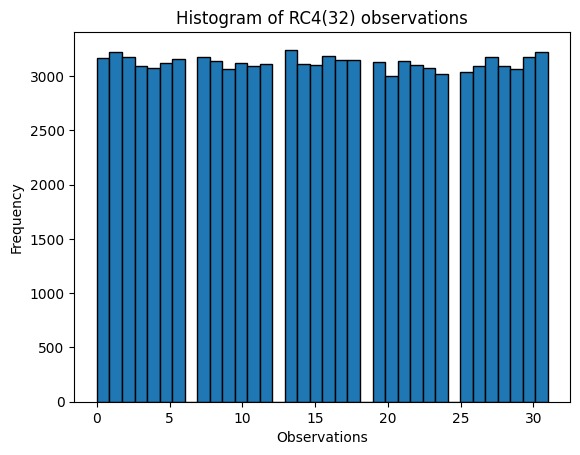

In [ ]:
plt.hist(prga_result2, bins=36, edgecolor='black')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Histogram of RC4(32) observations')
plt.show()

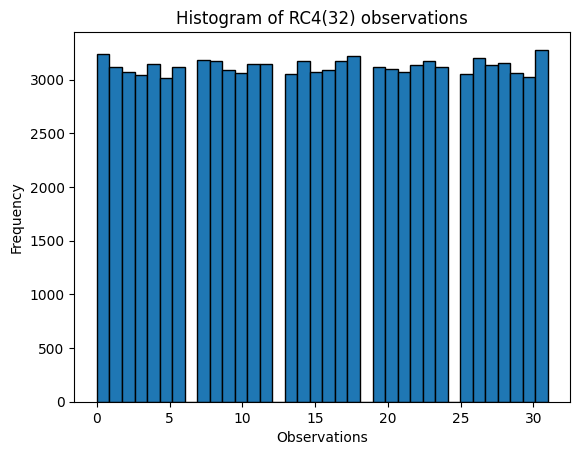

In [ ]:
from matplotlib import pyplot as plt
# With another key
key = np.array([9, 65, 2, 23, 51, 6, 5])
S = KSA(key)


prga = PRGA(S)
prga_result3 = [next(prga) for _ in range(10**5)]


plt.hist(prga_result3, bins=36, edgecolor='black')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Histogram of RC4(32) observations')
plt.show()

# Mersenne Twister

In [ ]:
import random

random_numbers = [random.random() for _ in range(10**5)]
print(random_numbers[1:10])




[0.5851945113209929, 0.19363367634313522, 0.8227688800778001, 0.6302303626009113, 0.280867641256075, 0.451427758712053, 0.5784248278688444, 0.5685387466276437, 0.4201722664686799]


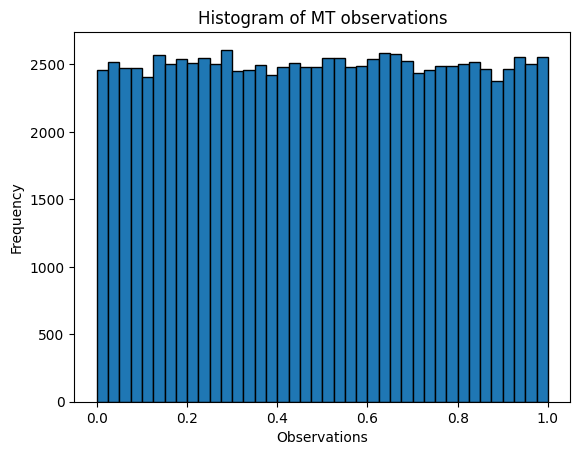

In [ ]:

plt.hist(random_numbers, bins=40, edgecolor='black')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Histogram of MT observations')
plt.show()



# CHi-kwadrat test






In [ ]:

import numpy as np
import scipy.stats as sstats
import pandas as pd

def chi_squared_test(data, num_bins=5):
    observed_frequencies, _ = np.histogram(data, bins=num_bins, range=(0, 1))  # Zakładając, że dane znajdują się w [0,1]
    expected_frequencies = [len(data) / num_bins] * num_bins
    chi2_statistic, p_value = sstats.chisquare(observed_frequencies, expected_frequencies)

    return chi2_statistic, p_value







In [ ]:

results = []

chi2, p = chi_squared_test(lcg_sequence / lcg_sequence.max())
results.append(["LCG", round(chi2, 4), round(p, 4)])

chi2, p = chi_squared_test(glcg_sequence / glcg_sequence.max())
results.append(["GLCG", round(chi2, 4), round(p, 4)])

chi2, p = chi_squared_test(prga_result1 / np.array(prga_result1).max(), num_bins = 16)
results.append(["RC4(1)", round(chi2, 4), round(p, 4)])

chi2, p = chi_squared_test(prga_result2 / np.array(prga_result2).max(), num_bins = 16)
results.append(["RC4(2)", round(chi2, 4), round(p, 4)])

chi2, p = chi_squared_test(random_numbers,num_bins = 5)
results.append(["Mersenne Twister", round(chi2, 4), round(p, 4)])

df_results_chi = pd.DataFrame(results, columns=["Sequence", "Chi-squared statistic", "P-value"])
df_results_chi.to_csv('df_results_chi.csv', index=False)

print(df_results_chi)

           Sequence  Chi-squared statistic  P-value
0               LCG            355030.4142   0.0000
1              GLCG               233.6903   0.0000
2            RC4(1)                11.9174   0.6853
3            RC4(2)                22.0422   0.1067
4  Mersenne Twister                 7.7583   0.1008



# KS TEST



In [ ]:


import numpy as np
import scipy.stats as stats
import numpy as np
import pandas as pd

results = []

ks_statistic, p_value = stats.kstest(lcg_sequence / lcg_sequence.max(), 'uniform', N=5)
results.append(["LCG", round(ks_statistic, 4), round(p_value, 4)])

ks_statistic, p_value = stats.kstest(glcg_sequence / glcg_sequence.max(), 'uniform', N=5)
results.append(["GLCG", round(ks_statistic, 4), round(p_value, 4)])

ks_statistic, p_value = stats.kstest(prga_result1 / np.array(prga_result1).max(), 'uniform', N=5)
results.append(["RC4(1)", round(ks_statistic, 4), round(p_value, 4)])

ks_statistic, p_value = stats.kstest(prga_result2 / np.array(prga_result2).max(), 'uniform', N=5)
results.append(["RC4(2)", round(ks_statistic, 4), round(p_value, 4)])

ks_statistic, p_value = stats.kstest(random_numbers, 'uniform', N=5)
results.append(["Mersenne Twister", round(ks_statistic, 4), round(p_value, 4)])


df_results_ks = pd.DataFrame(results, columns=["Sequence", "KS statistic", "P-value"])
df_results_ks.to_csv('df_results_ks.csv', index=False)

print(df_results_ks)


           Sequence  KS statistic  P-value
0               LCG        0.0769   0.0000
1              GLCG        0.0234   0.0000
2            RC4(1)        0.0319   0.0000
3            RC4(2)        0.0323   0.0000
4  Mersenne Twister        0.0030   0.3314


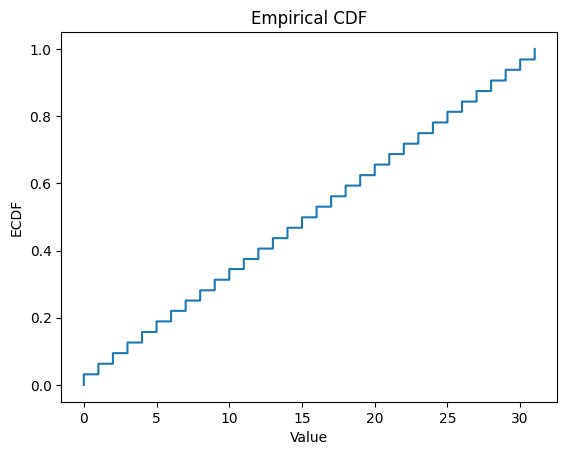

KS Statistic using empirical CDF: 0.99992
P-Value: 7.647285908706409e-89


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Obliczanie dystrybuanty empirycznej przy użyciu funkcji schodkowej
def empirical_cdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    y_values = np.arange(1, n + 1) / n
    return sorted_data, y_values

ecdf_x, ecdf_y = empirical_cdf(prga_result1 )

# Wyświetlenie wartości dystrybuanty empirycznej
plt.step(ecdf_x, ecdf_y, where="post")
plt.xlabel("Value")
plt.ylabel("ECDF")
plt.title("Empirical CDF")
plt.show()

# Funkcja do testu KS używająca dystrybuanty empirycznej
def ks_test_empirical(data, ecdf_x, ecdf_y):
    d_max = 0
    n = len(data)
    for i in range(n):
        cdf_val = ecdf_y[np.searchsorted(ecdf_x, data[i], side="right") - 1]
        d = np.abs(cdf_val - (i + 1) / n)
        if d > d_max:
            d_max = d
    p_value = kstest(data, lambda x: np.interp(x, ecdf_x, ecdf_y)).pvalue
    return d_max, p_value

# Przeprowadzenie testu KS
d_max, p_value = ks_test_empirical(prga_result1, ecdf_x, ecdf_y)
print(f"KS Statistic using empirical CDF: {d_max}")
print(f"P-Value: {p_value}")






# Linear complexity test

In [ ]:
import numpy as np
import copy

def berlekamp_massey_algorithm(block_data):
    n = len(block_data)
    c = np.zeros(n)
    b = np.zeros(n)
    c[0], b[0] = 1, 1
    l, m, i = 0, -1, 0
    int_data = [int(el) for el in block_data]
    while i < n:
        v = int_data[(i - l):i]
        v = v[::-1]
        cc = c[1:l + 1]
        d = (int_data[i] + np.dot(v, cc)) % 2
        if d == 1:
            temp = copy.copy(c)
            p = np.zeros(n)
            for j in range(0, l):
                if b[j] == 1:
                    p[j + i - m] = 1
            c = (c + p) % 2
            if l <= 0.5 * i:
                l = i + 1 - l
                m = i
                b = temp
        i += 1
    return l

import numpy as np
import scipy.special as spc

def linear_complexity_test(bin_data, block_size=500):
    dof = 6
    piks = [0.01047, 0.03125, 0.125, 0.5, 0.25, 0.0625, 0.020833]

    t2 = (block_size / 3.0 + 2.0 / 9) / 2 ** block_size
    mean = 0.5 * block_size + (1.0 / 36) * (9 + (-1) ** (block_size + 1)) - t2

    num_blocks = int(len(bin_data) / block_size)
    if num_blocks > 1:
        block_end = block_size
        block_start = 0
        blocks = []
        for i in range(num_blocks):
            blocks.append(bin_data[block_start:block_end])
            block_start += block_size
            block_end += block_size

        complexities = []
        for block in blocks:
            complexities.append(berlekamp_massey_algorithm(block))

        t = ([-1.0 * (((-1) ** block_size) * (chunk - mean) + 2.0 / 9) for chunk in complexities])
        vg = np.histogram(t, bins=[-9999999999, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 9999999999])[0][::-1]
        im = ([((vg[ii] - num_blocks * piks[ii]) ** 2) / (num_blocks * piks[ii]) for ii in range(7)])

        chi_squared = 0.0
        for i in range(len(piks)):
            chi_squared += im[i]
        p_val = spc.gammaincc(dof / 2.0, chi_squared / 2.0)
        return p_val
    else:
        return -1.0





In [ ]:
import numpy as np
import pandas as pd


# Normalize sequences and convert to bits
lcg_normalized = lcg_sequence / np.max(lcg_sequence)
lcg_bits = (lcg_normalized > 0.5).astype(int)
p_value_lcg = linear_complexity_test(lcg_bits)

glcg_normalized = glcg_sequence / np.max(glcg_sequence)
glcg_bits = (glcg_normalized > 0.5).astype(int)
p_value_glcg = linear_complexity_test(glcg_bits)

prga_result1_normalized = prga_result1 / np.max(prga_result1)
prga_result1_bits = (prga_result1_normalized > 0.5).astype(int)
p_value_prga1 = linear_complexity_test(prga_result1_bits)

prga_result2_normalized = prga_result2 / np.max(prga_result2)
prga_result2_bits = (prga_result2_normalized > 0.5).astype(int)
p_value_prga2 = linear_complexity_test(prga_result2_bits)

random_numbers_normalized = random_numbers
random_numbers_bits = (np.array(random_numbers_normalized) > 0.5).astype(int)
p_value_mt = linear_complexity_test(random_numbers_bits)

# Tworzenie ramki danych
results = [
    ["LCG",  round(p_value_lcg, 4)],
    ["GLCG",  round(p_value_glcg, 4)],
    ["RC4(1)",  round(p_value_prga1, 4)],
    ["RC4(2)",  round(p_value_prga2, 4)],
    ["Mersenne Twister",  round(p_value_mt, 4)]
]

df_results_lc = pd.DataFrame(results, columns=["Sequence",  "P-value"])
df_results_lc.to_csv('df_results_lc.csv', index=False)

print(df_results_lc)


           Sequence  P-value
0               LCG   0.0000
1              GLCG   0.0000
2            RC4(1)   0.4733
3            RC4(2)   0.9066
4  Mersenne Twister   0.9397


# Zadanie 2)




In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sstats

def monobit_test(bits):

    n = len(bits)
    s = np.sum(2 * bits - 1)  # Calculate the sum of (2*bit - 1)
    sobs = abs(s) / np.sqrt(n)
    p_value = 2 * (1 - sstats.norm.cdf(sobs))
    return sobs, p_value

s_obs_pi, p_val_pi = monobit_test(digits_pi)
s_obs_e, p_val_e = monobit_test(digits_e)
s_obs_sqrt2, p_val_sqrt2 = monobit_test(digits_sqrt2)

results = [
    ["pi", round(s_obs_pi,4), round(p_val_pi, 4)],   # Zaokrąglanie do 4 miejsc po przecinku
    ["e", round(s_obs_e,4), round(p_val_e, 4)],
    ["sqrt(2)", round(s_obs_sqrt2,4), round(p_val_sqrt2, 4)]
]

df_monobit_results = pd.DataFrame(results, columns=["Sequence", "S_obs", "P-value"])
df_monobit_results.to_csv('df_monobit_results.csv', index=False)
print(df_monobit_results)



  Sequence   S_obs  P-value
0       pi  0.5048   0.6137
1        e  0.0918   0.9269
2  sqrt(2)  0.2304   0.8178


0.8152033888372777


P-values from monobit test on divided parts of digits_pi:
[0.4866160457640505, 0.18412637278497979, 0.3759205825480747, 0.7518296340458492, 0.4866160457640505, 0.11384629800665813, 0.3115720733144085, 1.0, 0.6579690900638204, 0.6128816234132364, 0.14576681181311235, 0.569213649473711, 0.2059032107320684, 0.6128816234132364, 0.3759205825480747, 0.14576681181311235, 0.25494516431732106, 0.2059032107320684, 0.2059032107320684, 0.1290413050994681, 0.34278171114791145, 0.569213649473711, 0.25494516431732106, 0.04298479507085862, 0.44788447826411204, 0.569213649473711, 0.6128816234132364, 0.18412637278497979, 0.8495154923650348, 0.8495154923650348, 0.569213649473711, 0.6579690900638204, 0.25494516431732106, 0.25494516431732106, 0.569213649473711, 0.164103506825787, 0.2822966525833144, 0.8495154923650348, 0.6128816234132364, 1.0, 0.10009682885123228, 0.2059032107320684, 0.8495154923650348, 0.8002819583293617, 0.7043364134884518, 0.3115720733144085, 0.8495154923650348, 0.8495154923650348, 0.89

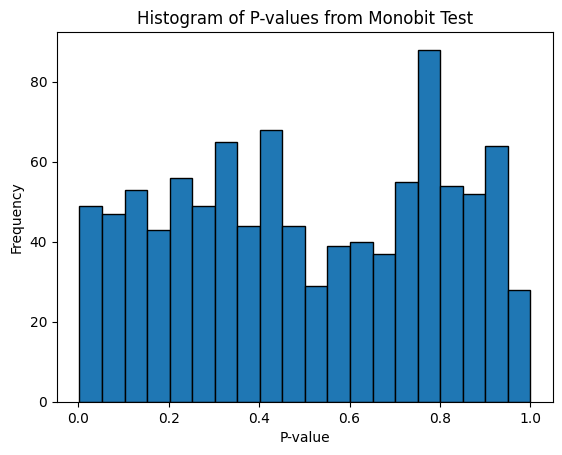

P-values from monobit test on divided parts of digits_e:
[0.10009682885123228, 0.18412637278497979, 0.07658140903567001, 0.3115720733144085, 0.9495709711511051, 0.569213649473711, 0.04298479507085862, 0.44788447826411204, 0.5270892568655381, 0.25494516431732106, 0.1290413050994681, 0.6128816234132364, 0.3759205825480747, 0.569213649473711, 0.8002819583293617, 0.6128816234132364, 0.8993431885613663, 0.4866160457640505, 0.164103506825787, 0.8002819583293617, 0.9495709711511051, 0.8002819583293617, 0.44788447826411204, 0.3759205825480747, 0.6128816234132364, 0.14576681181311235, 0.44788447826411204, 0.7043364134884518, 0.8002819583293617, 0.4866160457640505, 0.3759205825480747, 0.9495709711511051, 0.6128816234132364, 0.34278171114791145, 0.569213649473711, 0.164103506825787, 0.8495154923650348, 0.7518296340458492, 0.410967522088336, 0.6128816234132364, 0.8002819583293617, 0.8002819583293617, 0.44788447826411204, 0.25494516431732106, 0.25494516431732106, 0.34278171114791145, 0.527089256865

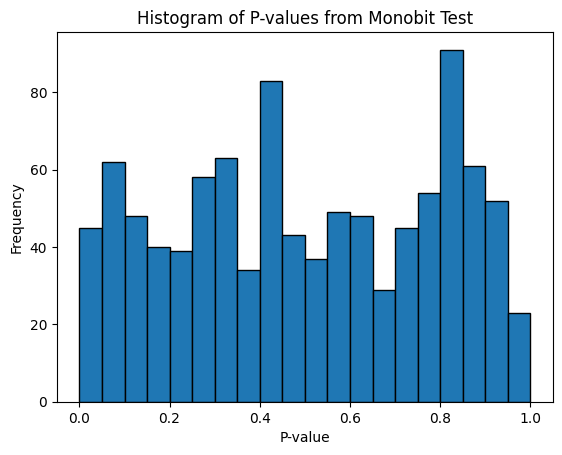

P-values from monobit test on divided parts of digits_sqrt2:
[0.7043364134884518, 0.11384629800665813, 0.1290413050994681, 0.5270892568655381, 0.3759205825480747, 0.410967522088336, 0.7043364134884518, 0.25494516431732106, 0.8002819583293617, 0.2822966525833144, 0.8002819583293617, 0.8993431885613663, 0.14576681181311235, 0.6128816234132364, 0.8495154923650348, 0.34278171114791145, 0.14576681181311235, 0.7518296340458492, 0.9495709711511051, 0.7043364134884518, 0.6579690900638204, 0.9495709711511051, 0.013641155794968496, 0.410967522088336, 0.8993431885613663, 0.4866160457640505, 0.8002819583293617, 0.6579690900638204, 0.4866160457640505, 0.2059032107320684, 0.5270892568655381, 0.3115720733144085, 0.410967522088336, 0.9495709711511051, 0.34278171114791145, 0.2822966525833144, 0.9495709711511051, 0.14576681181311235, 0.7518296340458492, 0.569213649473711, 0.7043364134884518, 0.0499242840396974, 0.1290413050994681, 0.8002819583293617, 0.164103506825787, 0.6579690900638204, 0.704336413488

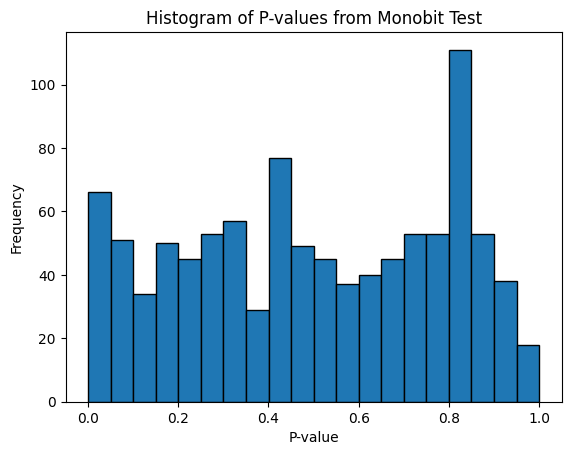

In [ ]:
import numpy as np
import scipy.stats as sstats

def divide_and_test(bits, part_size):
    p_values = []
    num_parts = len(bits) // part_size
    for i in range(num_parts):
        part = bits[i * part_size:(i + 1) * part_size]
        _, p_value = monobit_test(part)
        p_values.append(p_value)
    return p_values


part_size = 1000  # Define the size of each part
p_values_pi = divide_and_test(digits_pi, part_size)

print("P-values from monobit test on divided parts of digits_pi:")
print(p_values_pi)

plt.hist(p_values_pi, bins=20, edgecolor='black')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Histogram of P-values from Monobit Test')
plt.show()

p_values_e = divide_and_test(digits_e[0:1004000], part_size)

print("P-values from monobit test on divided parts of digits_e:")
print(p_values_e)

plt.hist(p_values_e, bins=20, edgecolor='black')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Histogram of P-values from Monobit Test')
plt.show()

p_values_sqrt2 = divide_and_test(digits_sqrt2[0:1004000], part_size)

print("P-values from monobit test on divided parts of digits_sqrt2:")
print(p_values_sqrt2)

plt.hist(p_values_sqrt2, bins=20, edgecolor='black')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Histogram of P-values from Monobit Test')
plt.show()


In [ ]:
import pandas as pd

# Second-level testing for p-values from the first-level tests
def second_level_testing(p_values, num_bins=5):
    # Obliczanie obserwowanych częstotliwości
    observed_frequencies, _ = np.histogram(p_values, bins=num_bins, range=(0, 1))

    # Obliczanie oczekiwanych częstotliwości
    expected_frequencies = [len(p_values) / num_bins] * num_bins

    # Test chi-kwadrat
    chi2_statistic, p_value = sstats.chisquare(observed_frequencies, expected_frequencies)
    return chi2_statistic, p_value



chi2_pi, p_val_second_pi = second_level_testing(p_values_pi)

chi2_e, p_val_second_e = second_level_testing(p_values_e)

chi2_sqrt2, p_val_second_sqrt2 = second_level_testing(p_values_sqrt2)

results = [
    ["pi", round(chi2_pi, 4), round(p_val_second_pi, 4)],
    ["e", round(chi2_e, 4), round(p_val_second_e, 4)],
    ["sqrt(2)", round(chi2_sqrt2, 4), round(p_val_second_sqrt2, 4)]
]

df_second_level_results = pd.DataFrame(results, columns=["Sequence", "Chi-squared statistic", "P-value"])
df_second_level_results.to_csv('df_second_level_results.csv', index=False)
print(df_second_level_results)


  Sequence  Chi-squared statistic  P-value
0       pi                16.9861   0.0019
1        e                 7.5040   0.1115
2  sqrt(2)                 3.9781   0.4090


1.266066417391006e-232

# Second level dla 1)

## LCG

In [ ]:
# prompt: napisz kod który powtarza losowanie z generatora LCG, z każdą iteracją wylicza p-wartość chi-kwadrat testu, ks testu oraz linear complexity test, przypisuje te p-vwartości do trzech różnych ramek

import pandas as pd
def perform_tests_lcg( sequence_name):

    chi2_df = pd.DataFrame(columns=['Iteration', 'p-value'])
    ks_df = pd.DataFrame(columns=['Iteration', 'p-value'])
    lc_df = pd.DataFrame(columns=['Iteration', 'p-value'])
    m = 13
    a = 1
    c = 5

    n = 10**4 # Reduced for demonstration

    for i in range(1000):
        x0 = i
        lcg_sequence = lcg(m, a, c, x0, n)
        normalized_sequence = lcg_sequence / np.max(lcg_sequence)

        # Chi-squared test
        chi2, p_chi2 = chi_squared_test(normalized_sequence)
        chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)

        # KS test
        ks_statistic, p_ks = stats.kstest(normalized_sequence, 'uniform')
        ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)

        # Linear Complexity test
        bits = (normalized_sequence > 0.5).astype(int)
        p_linear = linear_complexity_test(bits,block_size = 50)
        lc_df = pd.concat([lc_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_linear]})], ignore_index=True)

    return chi2_df, ks_df, lc_df

chi2_lcg_df, ks_lcg_df, lc_lcg_df = perform_tests_lcg( "LCG")

chi2_lcg_df.to_csv('chi2_lcg.csv', index=False)
ks_lcg_df.to_csv('ks_lcg.csv', index=False)
lc_lcg_df.to_csv('lc_lcg.csv', index=False)




<ipython-input-62-c4d54e444460>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)
<ipython-input-62-c4d54e444460>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)
<ipython-input-62-c4d54e444460>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecate

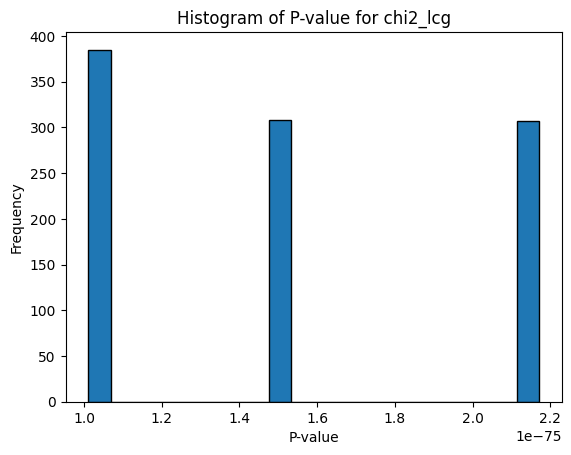

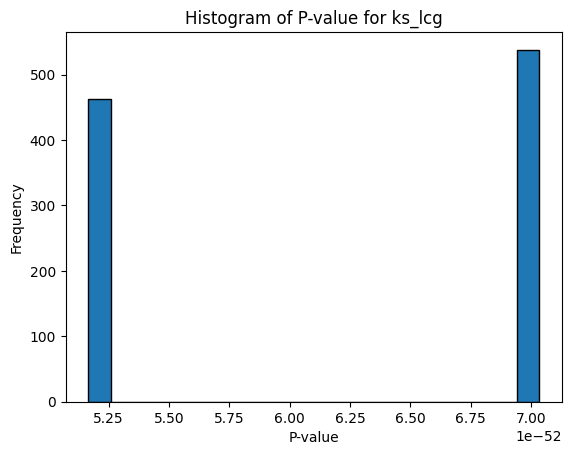

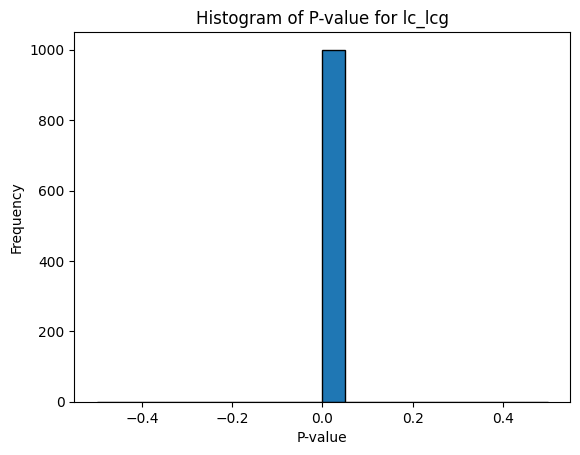

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

chi2_lcg_df = pd.read_csv('chi2_lcg.csv')
ks_lcg_df = pd.read_csv('ks_lcg.csv')
lc_lcg_df = pd.read_csv('lc_lcg.csv')


def create_histogram(df, title):
    plt.hist(df['p-value'], bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('P-value')
    plt.ylabel('Frequency')
    plt.show()

create_histogram(chi2_lcg_df, 'Histogram of P-value for chi2_lcg')
create_histogram(ks_lcg_df, 'Histogram of P-value for ks_lcg')
create_histogram(lc_lcg_df, 'Histogram of P-value for lc_lcg')



In [ ]:
def second_level_testing(p_values,num_bins=5):
  # Obliczanie obserwowanych częstotliwości
    observed_frequencies, _ = np.histogram(p_values,bins=num_bins, range=(0, 1))  # Zakładając, że dane znajdują się w [0,1]

    # Obliczanie oczekiwanych częstotliwości
    expected_frequencies = [len(p_values) / num_bins] * num_bins

    # Chi-squared test
    chi2_statistic, p_value = sstats.chisquare(observed_frequencies, expected_frequencies)

    return chi2_statistic, p_value

(4000.0, 0.0)
(4000.0, 0.0)
(4000.0, 0.0)


## GLCG

In [ ]:
import pandas as pd
def perform_tests_glcg( sequence_name):

    chi2_df = pd.DataFrame(columns=['Iteration', 'p-value'])
    ks_df = pd.DataFrame(columns=['Iteration', 'p-value'])
    lc_df = pd.DataFrame(columns=['Iteration', 'p-value'])
    m = 2**10
    a_coefficients = [3, 7, 68]
    n = 10**4 # Number of random numbers to generate
    for i in range(1000):
        initial_values = [i*2+4, 8+ i, i*3]
        glcg_sequence = glcg(m, a_coefficients, initial_values, n)
        normalized_sequence = glcg_sequence / np.max(glcg_sequence)

        # Chi-squared test
        chi2, p_chi2 = chi_squared_test(normalized_sequence)
        chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)

        # KS test
        ks_statistic, p_ks = stats.kstest(normalized_sequence, 'uniform')
        ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)

        # Linear Complexity test
        bits = (normalized_sequence > 0.5).astype(int)
        p_linear = linear_complexity_test(bits,block_size = 50)
        lc_df = pd.concat([lc_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_linear]})], ignore_index=True)

    return chi2_df, ks_df, lc_df

chi2_glcg_df, ks_glcg_df, lc_glcg_df = perform_tests_glcg( "GLCG")

chi2_glcg_df.to_csv('chi2_glcg.csv', index=False)
ks_glcg_df.to_csv('ks_glcg.csv', index=False)
lc_glcg_df.to_csv('lc_glcg.csv', index=False)

<ipython-input-66-67bb002dfdd9>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)
<ipython-input-66-67bb002dfdd9>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)
<ipython-input-66-67bb002dfdd9>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecate

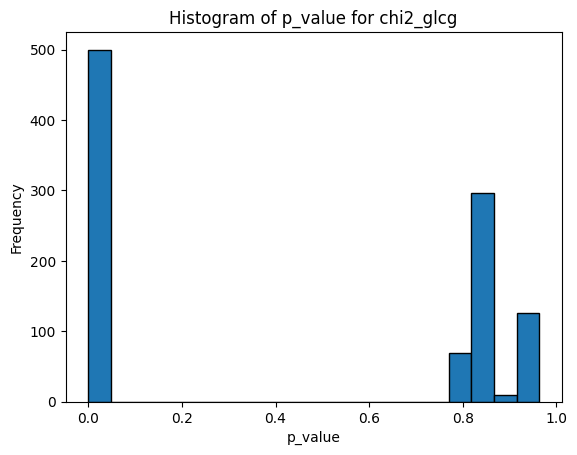

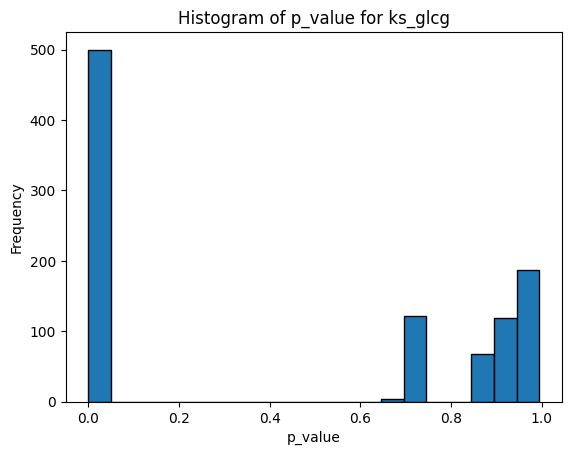

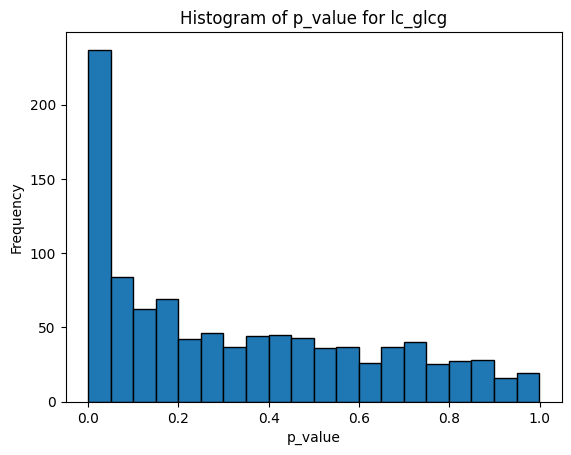

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


chi2_glcg_df = pd.read_csv('chi2_glcg.csv')
ks_glcg_df = pd.read_csv('ks_glcg.csv')
lc_glcg_df = pd.read_csv('lc_glcg.csv')

def create_histogram(df, title ):
    plt.hist(df['p-value'], bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('p_value')
    plt.ylabel('Frequency')
    plt.show()


create_histogram(chi2_glcg_df, 'Histogram of p_value for chi2_glcg')
create_histogram(ks_glcg_df, 'Histogram of p_value for ks_glcg')
create_histogram(lc_glcg_df, 'Histogram of p_value for lc_glcg')



## RC4(1) second level


In [ ]:
import pandas as pd
def perform_tests_rc1( sequence_name):

  chi2_df = pd.DataFrame(columns=['Iteration', 'p-value'])
  ks_df = pd.DataFrame(columns=['Iteration', 'p-value'])
  lc_df = pd.DataFrame(columns=['Iteration', 'p-value'])

  for i in range(1000):

    key = initialize_with_key()
    S = KSA(key)
    rga = PRGA(S)
    prga_result1 = [next(prga) for _ in range(10**4)]

    normalized_sequence = prga_result1 / np.max(prga_result1)

    # Chi-squared test
    chi2, p_chi2 = chi_squared_test(normalized_sequence,num_bins=16)
    chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)

    # KS test
    ks_statistic, p_ks = stats.kstest(normalized_sequence, 'uniform')
    ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)

    # Linear Complexity test
    bits = (normalized_sequence > 0.5).astype(int)
    p_linear = linear_complexity_test(bits,block_size = 50)
    lc_df = pd.concat([lc_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_linear]})], ignore_index=True)

  return chi2_df, ks_df, lc_df



chi2_RC1_df, ks_RC1_df, lc_RC1_df = perform_tests_rc1( "RC1")


chi2_RC1_df.to_csv('chi2_RC1.csv', index=False)
ks_RC1_df.to_csv('ks_RC1.csv', index=False)
lc_RC1_df.to_csv('lc_RC1.csv', index=False)

<ipython-input-68-f875fcd02825>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)
<ipython-input-68-f875fcd02825>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)
<ipython-input-68-f875fcd02825>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecate

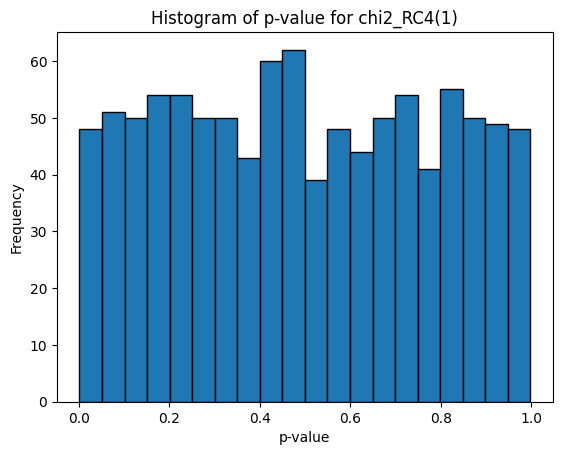

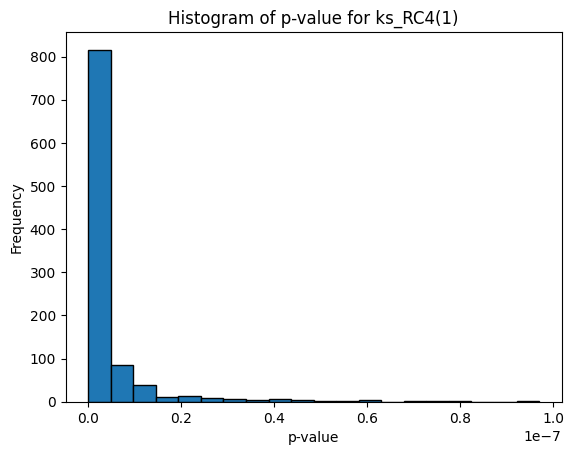

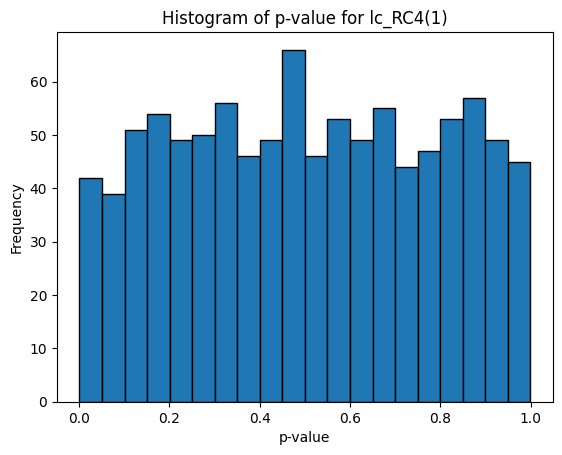

In [ ]:
chi2_RC1_df = pd.read_csv('chi2_RC1.csv')
ks_RC1_df = pd.read_csv('ks_RC1.csv')
lc_RC1_df = pd.read_csv('lc_RC1.csv')


def create_histogram(df, title):
    plt.hist(df['p-value'], bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.show()


create_histogram(chi2_RC1_df, 'Histogram of p-value for chi2_RC4(1)')
create_histogram(ks_RC1_df, 'Histogram of p-value for ks_RC4(1)')
create_histogram(lc_RC1_df, 'Histogram of p-value for lc_RC4(1)')

## RC4(2) second level

In [ ]:
import pandas as pd
def perform_tests_rc2( sequence_name):


  chi2_df = pd.DataFrame(columns=['Iteration', 'p-value'])
  ks_df = pd.DataFrame(columns=['Iteration', 'p-value'])
  lc_df = pd.DataFrame(columns=['Iteration', 'p-value'])

  for i in range(1000):

    key = np.array([23+i, 7*i, 20*i, 1, 1001-i, 9+i, 75])
    S = KSA(key)
    rga = PRGA(S)

    prga_result2 = [next(prga) for _ in range(10**4)]

    normalized_sequence = prga_result2 / np.max(prga_result2)

    # Chi-squared test
    chi2, p_chi2 = chi_squared_test(normalized_sequence, num_bins = 16)
    chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)

    # KS test
    ks_statistic, p_ks = stats.kstest(normalized_sequence, 'uniform')
    ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)

    # Linear Complexity test
    bits = (normalized_sequence > 0.5).astype(int)
    p_linear = linear_complexity_test(bits,block_size = 50)
    lc_df = pd.concat([lc_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_linear]})], ignore_index=True)

  return chi2_df, ks_df, lc_df



chi2_RC2_df, ks_RC2_df, lc_RC2_df = perform_tests_rc2( "RC2")


chi2_RC2_df.to_csv('chi2_RC2.csv', index=False)
ks_RC2_df.to_csv('ks_RC2.csv', index=False)
lc_RC2_df.to_csv('lc_RC2.csv', index=False)

<ipython-input-70-1527a74d5ffd>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)
<ipython-input-70-1527a74d5ffd>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)
<ipython-input-70-1527a74d5ffd>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecate

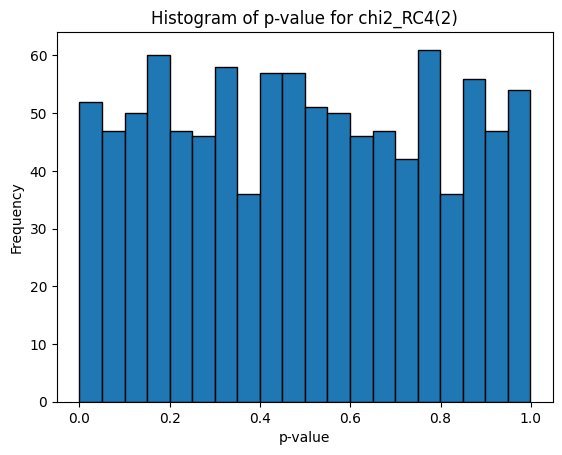

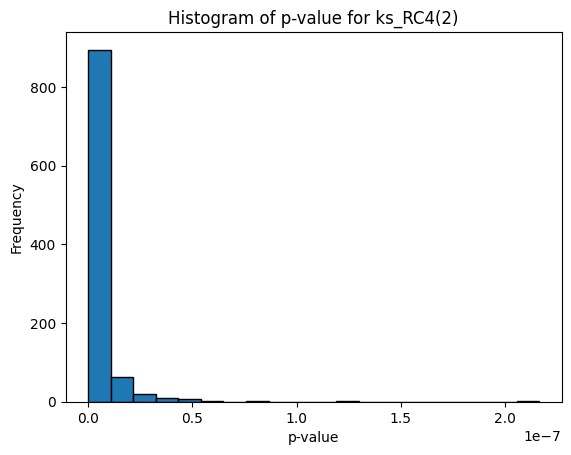

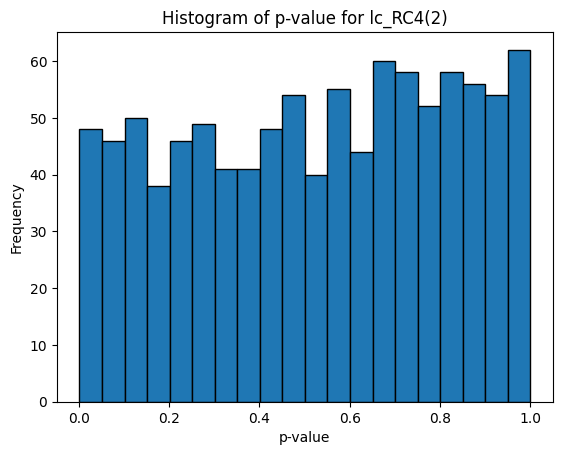

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


chi2_RC2_df = pd.read_csv('chi2_RC2.csv')
ks_RC2_df = pd.read_csv('ks_RC2.csv')
lc_RC2_df = pd.read_csv('lc_RC2.csv')


def create_histogram(df, title):
    plt.hist(df['p-value'], bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.show()


create_histogram(chi2_RC2_df, 'Histogram of p-value for chi2_RC4(2)')
create_histogram(ks_RC2_df, 'Histogram of p-value for ks_RC4(2)')
create_histogram(lc_RC2_df, 'Histogram of p-value for lc_RC4(2)')


## MT - second level

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random

def perform_tests_MT( sequence_name):
  chi2_df = pd.DataFrame(columns=['Iteration', 'p-value'])
  ks_df = pd.DataFrame(columns=['Iteration', 'p-value'])
  lc_df = pd.DataFrame(columns=['Iteration', 'p-value'])

  for i in range(1000):
    random_numbers = [random.random() for _ in range(10**4)]
    normalized_sequence = np.array(random_numbers)

    # Chi-squared test
    chi2, p_chi2 = chi_squared_test(normalized_sequence)
    chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)

    # KS test
    ks_statistic, p_ks = stats.kstest(normalized_sequence, 'uniform')
    ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)

    # Linear Complexity test
    bits = (normalized_sequence > 0.5).astype(int)
    p_linear = linear_complexity_test(bits,block_size=50)
    lc_df = pd.concat([lc_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_linear]})], ignore_index=True)

  return chi2_df, ks_df, lc_df



chi2_MR_df, ks_MR_df, lc_MR_df = perform_tests_MT( "MT")

chi2_MR_df.to_csv('chi2_MR.csv', index=False)
ks_MR_df.to_csv('ks_MR.csv', index=False)
lc_MR_df.to_csv('lc_MR.csv', index=False)

<ipython-input-58-bc6aee2d92a4>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi2_df = pd.concat([chi2_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_chi2]})], ignore_index=True)
<ipython-input-58-bc6aee2d92a4>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ks_df = pd.concat([ks_df, pd.DataFrame({'Iteration': [i], 'p-value': [p_ks]})], ignore_index=True)
<ipython-input-58-bc6aee2d92a4>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecate

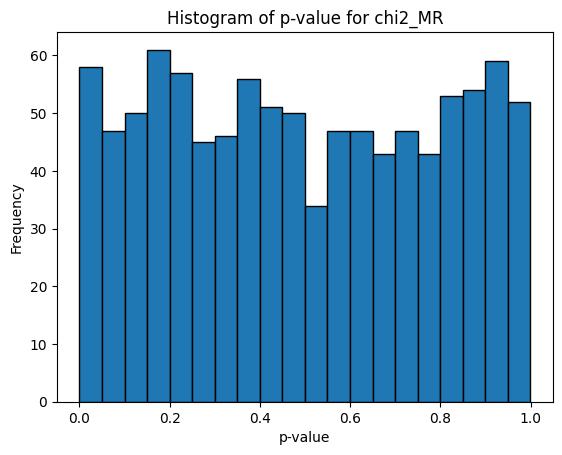

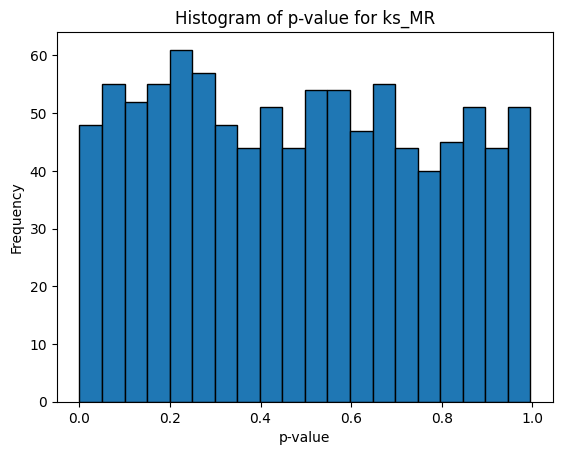

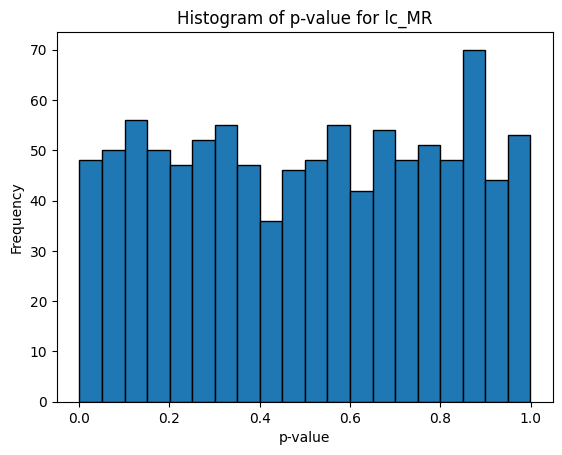

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


chi2_MR_df = pd.read_csv('chi2_MR.csv')
ks_MR_df = pd.read_csv('ks_MR.csv')
lc_MR_df = pd.read_csv('lc_MR.csv')

def create_histogram(df, title):
    plt.hist(df['p-value'], bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.show()


create_histogram(chi2_MR_df, 'Histogram of p-value for chi2_MR')
create_histogram(ks_MR_df, 'Histogram of p-value for ks_MR')
create_histogram(lc_MR_df, 'Histogram of p-value for lc_MR')


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sstats

def second_level_testing(p_values, num_bins=5):

    observed_frequencies, _ = np.histogram(p_values, num_bins, range=(0, 1))

    expected_frequencies = [len(p_values) / num_bins] * num_bins

    chi2_statistic, p_value = sstats.chisquare(observed_frequencies, expected_frequencies)
    return chi2_statistic, p_value

results = []

def append_results(test_name, df, num_bins=5):
    chi2_statistic, p_value = second_level_testing(df["p-value"], num_bins=num_bins)
    results.append([test_name, round(chi2_statistic, 4), round(p_value, 4)])


append_results("chi2.RC4(1)", chi2_RC1_df, num_bins=16)
append_results("ks.RC4(1)", ks_RC1_df, num_bins=16)
append_results("lc.RC4(1)", lc_RC1_df, num_bins=16)

append_results("chi2.RC4(2)", chi2_RC2_df, num_bins=16)
append_results("ks.RC4(2)", ks_RC2_df, num_bins=16)
append_results("lc.RC4(2)", lc_RC2_df, num_bins=16)

append_results("chi2.MT", chi2_MR_df)
append_results("ks.MT", ks_MR_df)
append_results("lc.MT", lc_MR_df,)

append_results("chi2.LCG", chi2_lcg_df)
append_results("ks.LCG", ks_lcg_df)
append_results("lc.LCG", lc_lcg_df)

append_results("chi2.GLCG", chi2_glcg_df)
append_results("ks.GLCG", ks_glcg_df)
append_results("lc.GLCG", lc_glcg_df)

results_df = pd.DataFrame(results, columns=["Test", "Chi2_statistic", "P_value"])
results_df.to_csv('sec_level_1.csv', index=False)



           Test  Chi2_statistic  P_value
0   chi2.RC4(1)          12.864   0.6128
1     ks.RC4(1)       15000.000   0.0000
2     lc.RC4(1)          61.984   0.0000
3   chi2.RC4(2)          11.712   0.7007
4     ks.RC4(2)       15000.000   0.0000
5     lc.RC4(2)          53.920   0.0000
6       chi2.MT          12.224   0.6620
7         ks.MT           9.920   0.8247
8         lc.MT          44.736   0.0001
9      chi2.LCG       15000.000   0.0000
10       ks.LCG       15000.000   0.0000
11       lc.LCG       15000.000   0.0000
12    chi2.GLCG        4885.856   0.0000
13      ks.GLCG        4286.464   0.0000
14      lc.GLCG        3971.200   0.0000
